## TASK 7
### Stock Market Prediction using Numerical and Textual Analysis

### Author- SHRIJA SHWEETA
Data Science and Business Analytics Intern<br>
Task 7: Task is to perform Stock Market Prediction using Numerical and Textual Analysis

In [5]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
## load the dataset
df=pd.read_csv('BSESN.csv')

In [7]:
## print first 5 rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0


In [8]:
## print the shape of dataset
df.shape

(4946, 7)

In [9]:
#Converting Date column to datetime datatype
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4946 entries, 0 to 4945
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4946 non-null   datetime64[ns]
 1   Open       4872 non-null   float64       
 2   High       4872 non-null   float64       
 3   Low        4872 non-null   float64       
 4   Close      4872 non-null   float64       
 5   Adj Close  4872 non-null   float64       
 6   Volume     4872 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 270.6 KB


In [10]:
df.dropna(inplace = True)

Text(0, 0.5, 'Close')

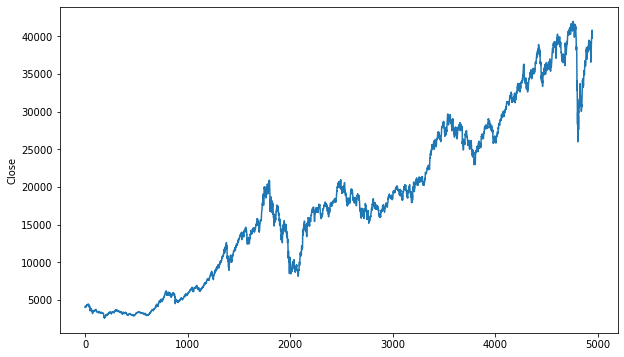

In [11]:
plt.figure(figsize=(10, 6))
df['Close'].plot()
plt.ylabel('Close')

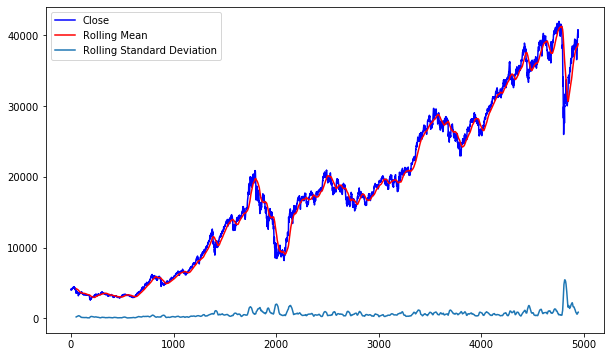

In [12]:
#Plotting moving average
close = df['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 6))
df['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

Text(0.5, 1.0, 'Returns')

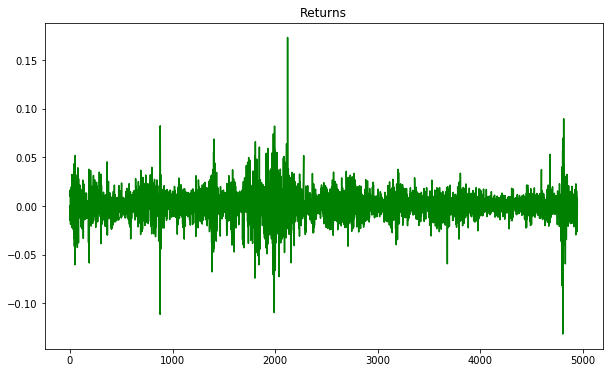

In [13]:
#Plotting returns
returns = close / close.shift(1) - 1

plt.figure(figsize = (10,6))
returns.plot(label='Return', color = 'g')
plt.title("Returns")

In [14]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller, acf, pacf

In [15]:
train = df[:1000]
test = df[1000:]

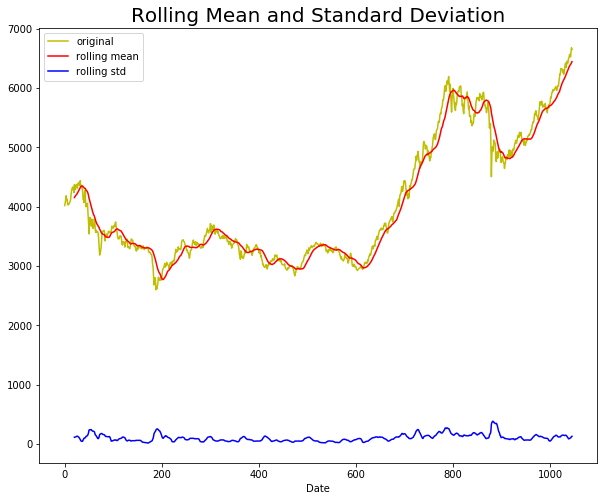

Results of dickey fuller test
ADF Test Statistic : 0.6847089129500284
p-value : 0.9895277172383614
#Lags Used : 6
Number of Observations Used : 993
Weak evidence against null hypothesis, time series is non-stationary 


In [16]:
#Stationarity test
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(20).mean()
    rolstd = timeseries.rolling(20).std()

    #Plot rolling statistics:
    plt.figure(figsize = (10,8))
    plt.plot(timeseries, color = 'y', label = 'original')
    plt.plot(rolmean, color = 'r', label = 'rolling mean')
    plt.plot(rolstd, color = 'b', label = 'rolling std')
    plt.xlabel('Date')
    plt.legend()
    plt.title('Rolling Mean and Standard Deviation',  fontsize = 20)
    plt.show(block = False)
    print('Results of dickey fuller test')
    result = adfuller(timeseries, autolag = 'AIC')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train['Close'])

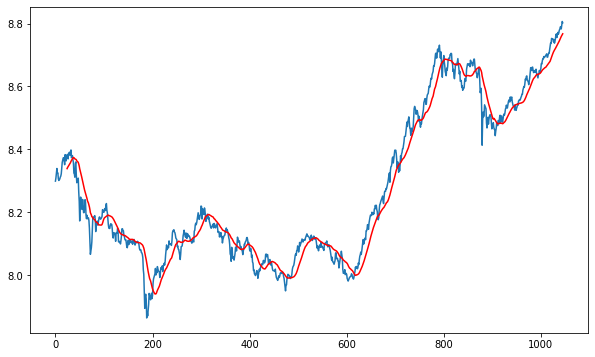

In [17]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (10,6))
plt.plot(train_log) 
plt.plot(mav, color = 'red') 

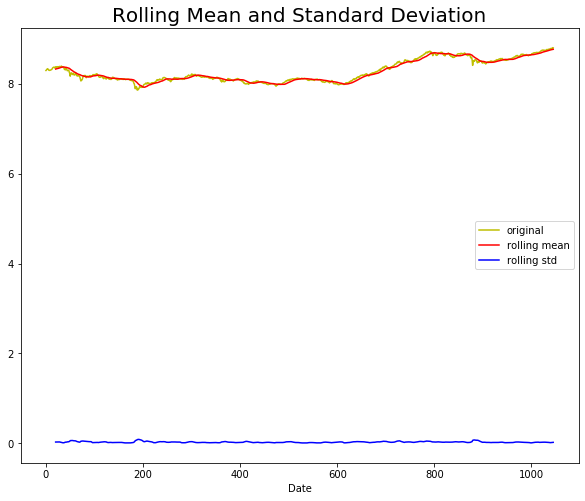

Results of dickey fuller test
ADF Test Statistic : 0.09925455869129639
p-value : 0.9660101624822948
#Lags Used : 4
Number of Observations Used : 995
Weak evidence against null hypothesis, time series is non-stationary 


In [18]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)

test_stationarity(train_log)

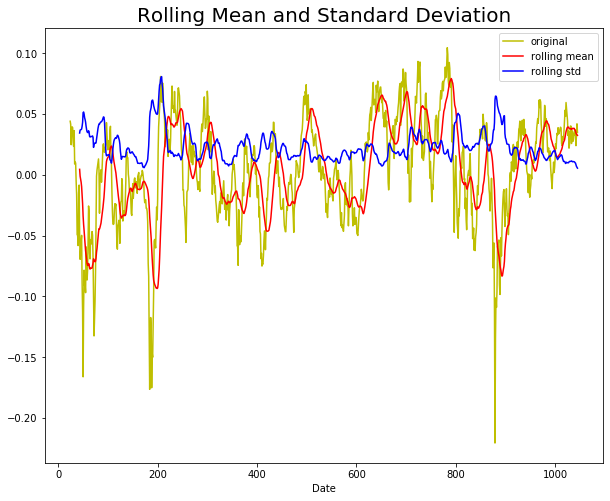

Results of dickey fuller test
ADF Test Statistic : -5.736980339921389
p-value : 6.404632148346681e-07
#Lags Used : 4
Number of Observations Used : 972
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [19]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)

In [20]:
pip install pmdarima

In [21]:
#Using auto arima to make predictions using log data
from pmdarima import auto_arima
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=4.79 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-5036.986, Time=0.38 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-5215.671, Time=0.18 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=1.23 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-5365.859, Time=1.05 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-5471.941, Time=0.74 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=-5498.937, Time=0.95 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=-5508.753, Time=1.25 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=-5643.982, Time=4.44 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=4.17 sec
 ARIMA(5,2,2)(0,0,0)[0]             : AIC=-5610.930, Time=4.79 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=inf, Time=4.50 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=-5544.055, Time=10.70 sec

Best model:  ARIMA(5,2,1)(0,0,0)[0]          
Total fit time: 39.218 seconds


Text(0, 0.5, 'Actual Stock Price')

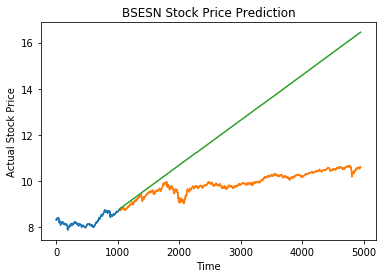

In [22]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

In [23]:
#Calculating error
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(test_log,predictions))
print("RMSE : ", rms)

RMSE :  3.2582503481534033


In [24]:
cols = ['Date','Category','News']
df_news = pd.read_csv('india_news_headlines.csv', names = cols)
df_news

E:\ml_and_dl\env\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010101,sports.wwe,win over cena satisfying but defeating underta...
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
3,20010102,unknown,Fissures in Hurriyat over Pak visit
4,20010102,unknown,America's unwanted heading for India?
...,...,...,...
3297168,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297169,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297170,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297171,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [25]:
df_news.drop(0, inplace=True)
df_news.drop('Category', axis = 1, inplace=True)
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297172 entries, 1 to 3297172
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 75.5+ MB


In [26]:
 #Converting data type of Date column 
df_news['Date'] = pd.to_datetime(df_news['Date'],format= '%Y%m%d')
df_news=df_news.head(10000)

In [27]:
#Grouping the headlines for each day
df_news['News'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news

<ipython-input-27-5807b6c2be63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['News'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x))


,Date,News
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-03,Powerless north India gropes in the dark Think...
3,2001-01-04,The string that pulled Stephen Hawking to Indi...
4,2001-01-05,Light combat craft takes India into club class...
...,...,...
162,2001-07-23,BSP focuses on Punjab; UP issues for polls Con...
163,2001-07-24,Wrong timing: Hike in fee for medical; dental ...
164,2001-07-25,Dataram signs up with Signet 70 pc govt staff ...
165,2001-07-26,Karnatak varsity MA results announced How to p...


In [28]:
df_news['News']

0      win over cena satisfying but defeating underta...
1      Status quo will not be disturbed at Ayodhya; s...
2      Powerless north India gropes in the dark Think...
3      The string that pulled Stephen Hawking to Indi...
4      Light combat craft takes India into club class...
                             ...                        
162    BSP focuses on Punjab; UP issues for polls Con...
163    Wrong timing: Hike in fee for medical; dental ...
164    Dataram signs up with Signet 70 pc govt staff ...
165    Karnatak varsity MA results announced How to p...
166    SEC gears up for local bodies election Higher ...
Name: News, Length: 167, dtype: object

In [29]:
pip install nltk

In [30]:
conda install re

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - re

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [31]:
pip install textblob

In [32]:
#Cleaning headlines
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.stem.porter import PorterStemmer
import re
c = []
ps=PorterStemmer()
for i in range(0,len(df_news['News'])):
    news = re.sub('[^a-zA-Z]',' ',df_news['News'][i])
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
    news=' '.join(news)
    c.append(news)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shrija\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Shrija\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
df_news['News'] = pd.Series(c)
df_news

,Date,News
0,2001-01-01,win cena satisfi defeat undertak bigger roman ...
1,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...
2,2001-01-03,powerless north india grope dark think laxman ...
3,2001-01-04,string pull stephen hawk india vajpaye give bi...
4,2001-01-05,light combat craft take india club class hawk ...
...,...,...
162,2001-07-23,bsp focus punjab issu poll cong worker kill am...
163,2001-07-24,wrong time hike fee medic dental cours sebi su...
164,2001-07-25,dataram sign signet pc govt staff join stir se...
165,2001-07-26,karnatak varsiti result announc poach partner ...


In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [35]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

In [36]:
#Adding subjectivity and polarity columns
df_news['Subjectivity'] = df_news['News'].apply(getSubjectivity)
df_news['Polarity'] = df_news['News'].apply(getPolarity)
df_news

,Date,News,Subjectivity,Polarity
0,2001-01-01,win cena satisfi defeat undertak bigger roman ...,0.450000,0.400000
1,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074
2,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000
3,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481
4,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404
...,...,...,...,...
162,2001-07-23,bsp focus punjab issu poll cong worker kill am...,0.373858,-0.007289
163,2001-07-24,wrong time hike fee medic dental cours sebi su...,0.466599,0.018876
164,2001-07-25,dataram sign signet pc govt staff join stir se...,0.331401,-0.017403
165,2001-07-26,karnatak varsiti result announc poach partner ...,0.333554,-0.008239


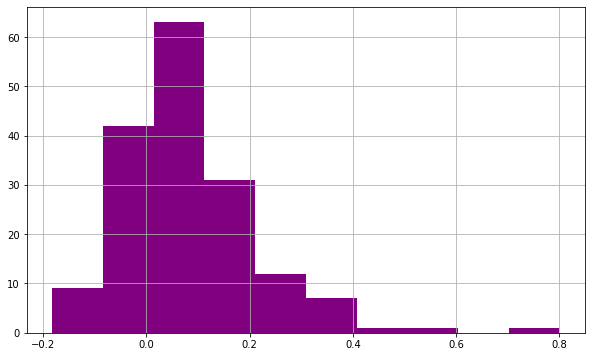

In [37]:
plt.figure(figsize = (10,6))
df_news['Polarity'].hist(color = 'purple')

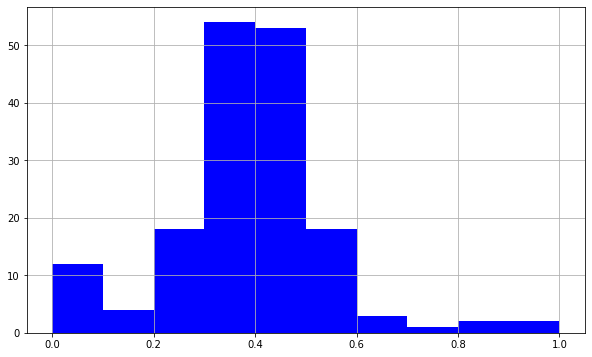

In [38]:
plt.figure(figsize = (10,6))
df_news['Subjectivity'].hist(color = 'blue')

In [39]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['News']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['News']]
df_news

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-01,win cena satisfi defeat undertak bigger roman ...,0.450000,0.400000,0.2023,0.234,0.469,0.297
1,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074,-0.8555,0.125,0.773,0.102
2,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000,-0.5994,0.132,0.755,0.113
3,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481,0.9169,0.099,0.791,0.110
4,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404,-0.3612,0.171,0.659,0.170
...,...,...,...,...,...,...,...,...
162,2001-07-23,bsp focus punjab issu poll cong worker kill am...,0.373858,-0.007289,-0.9967,0.139,0.790,0.071
163,2001-07-24,wrong time hike fee medic dental cours sebi su...,0.466599,0.018876,-0.9993,0.172,0.749,0.079
164,2001-07-25,dataram sign signet pc govt staff join stir se...,0.331401,-0.017403,-0.9988,0.159,0.771,0.070
165,2001-07-26,karnatak varsiti result announc poach partner ...,0.333554,-0.008239,-0.9997,0.195,0.722,0.084


In [41]:
df_merge = pd.merge(df, df_news, how='inner', on='Date')
df_merge

,Date,Open,High,Low,Close,Adj Close,Volume,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074,-0.8555,0.125,0.773,0.102
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0,powerless north india grope dark think laxman ...,0.429167,0.025000,-0.5994,0.132,0.755,0.113
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481,0.9169,0.099,0.791,0.110
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0,light combat craft take india club class hawk ...,0.458412,0.296404,-0.3612,0.171,0.659,0.170
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0,sangh parivar babri panel ant frontrunn key us...,0.486204,-0.035142,-0.6808,0.100,0.816,0.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2001-07-23,3340.889893,3340.889893,3310.949951,3330.979980,3330.979980,0.0,bsp focus punjab issu poll cong worker kill am...,0.373858,-0.007289,-0.9967,0.139,0.790,0.071
112,2001-07-24,3326.840088,3340.909912,3306.169922,3335.080078,3335.080078,0.0,wrong time hike fee medic dental cours sebi su...,0.466599,0.018876,-0.9993,0.172,0.749,0.079
113,2001-07-25,3307.159912,3338.219971,3296.429932,3301.969971,3301.969971,0.0,dataram sign signet pc govt staff join stir se...,0.331401,-0.017403,-0.9988,0.159,0.771,0.070
114,2001-07-26,3298.639893,3318.600098,3254.280029,3259.030029,3259.030029,0.0,karnatak varsiti result announc poach partner ...,0.333554,-0.008239,-0.9997,0.195,0.722,0.084


In [42]:
df1 = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df1

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,4018.879883,0.298148,0.099074,-0.8555,0.125,0.773,0.102
1,4060.020020,0.429167,0.025000,-0.5994,0.132,0.755,0.113
2,4115.370117,0.475140,0.032481,0.9169,0.099,0.791,0.110
3,4183.729980,0.458412,0.296404,-0.3612,0.171,0.659,0.170
4,4120.430176,0.486204,-0.035142,-0.6808,0.100,0.816,0.084
...,...,...,...,...,...,...,...
111,3330.979980,0.373858,-0.007289,-0.9967,0.139,0.790,0.071
112,3335.080078,0.466599,0.018876,-0.9993,0.172,0.749,0.079
113,3301.969971,0.331401,-0.017403,-0.9988,0.159,0.771,0.070
114,3259.030029,0.333554,-0.008239,-0.9997,0.195,0.722,0.084


In [45]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df1))
new_df.columns = df1.columns
new_df.index = df1.index
new_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.665840,0.298148,0.557192,0.072909,0.382263,0.699735,0.134921
1,0.698641,0.429167,0.410533,0.202397,0.403670,0.675926,0.149471
2,0.742772,0.475140,0.425345,0.969057,0.302752,0.723545,0.145503
3,0.797276,0.458412,0.947884,0.322833,0.522936,0.548942,0.224868
4,0.746807,0.486204,0.291458,0.161240,0.305810,0.756614,0.111111


In [46]:
X = new_df.drop('Close', axis=1)
y =new_df['Close']

In [47]:
X.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.298148,0.557192,0.072909,0.382263,0.699735,0.134921
1,0.429167,0.410533,0.202397,0.403670,0.675926,0.149471
2,0.475140,0.425345,0.969057,0.302752,0.723545,0.145503
3,0.458412,0.947884,0.322833,0.522936,0.548942,0.224868
4,0.486204,0.291458,0.161240,0.305810,0.756614,0.111111


In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(92, 6)

In [49]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
71,0.390873,0.193688,0.032764,0.470948,0.679894,0.116402
97,0.426136,0.626521,0.607746,0.440367,0.574074,0.235450
111,0.373858,0.346604,0.001517,0.425076,0.722222,0.093915
100,0.227273,0.496028,0.505461,0.000000,1.000000,0.000000
8,0.238603,0.506202,0.993023,0.122324,0.792328,0.154762
93,0.325108,0.854580,0.998382,0.232416,0.690476,0.208995
33,0.440734,0.270752,0.815098,0.211009,0.791005,0.117725
45,0.442549,0.500399,0.965568,0.385321,0.630952,0.202381
3,0.458412,0.947884,0.322833,0.522936,0.548942,0.224868
48,0.501515,0.556311,0.864698,0.437309,0.592593,0.218254


In [52]:
pip install lightgbm

In [53]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 
import lightgbm 
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [56]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [57]:
lgb = lightgbm.LGBMRegressor()
lgb.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [58]:
predictions = lgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.12259136975378587


In [59]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [60]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.1612475688317745
